In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
pd.set_option('display.max_columns', None)

In [3]:
df = pd.read_csv("/content/train.csv")

In [4]:
missing = df.isnull().sum()
missing_pct = (missing / len(df) * 100).round(2)
display(pd.DataFrame({"Missing Values": missing, "Missing %": missing_pct}).sort_values("Missing %", ascending=False))

print("\n=== Duplicate Rows ===")
print(df.duplicated().sum())

print("\n=== Unique Values per Column ===")
display(df.nunique())


,Missing Values,Missing %
Cabin,687,77.10
Age,177,19.87
Embarked,2,0.22
PassengerId,0,0.00
Name,0,0.00
Pclass,0,0.00
Survived,0,0.00
Sex,0,0.00
Parch,0,0.00
SibSp,0,0.00



=== Duplicate Rows ===
0

=== Unique Values per Column ===


,0
PassengerId,891
Survived,2
Pclass,3
Name,891
Sex,2
Age,88
SibSp,7
Parch,7
Ticket,681
Fare,248


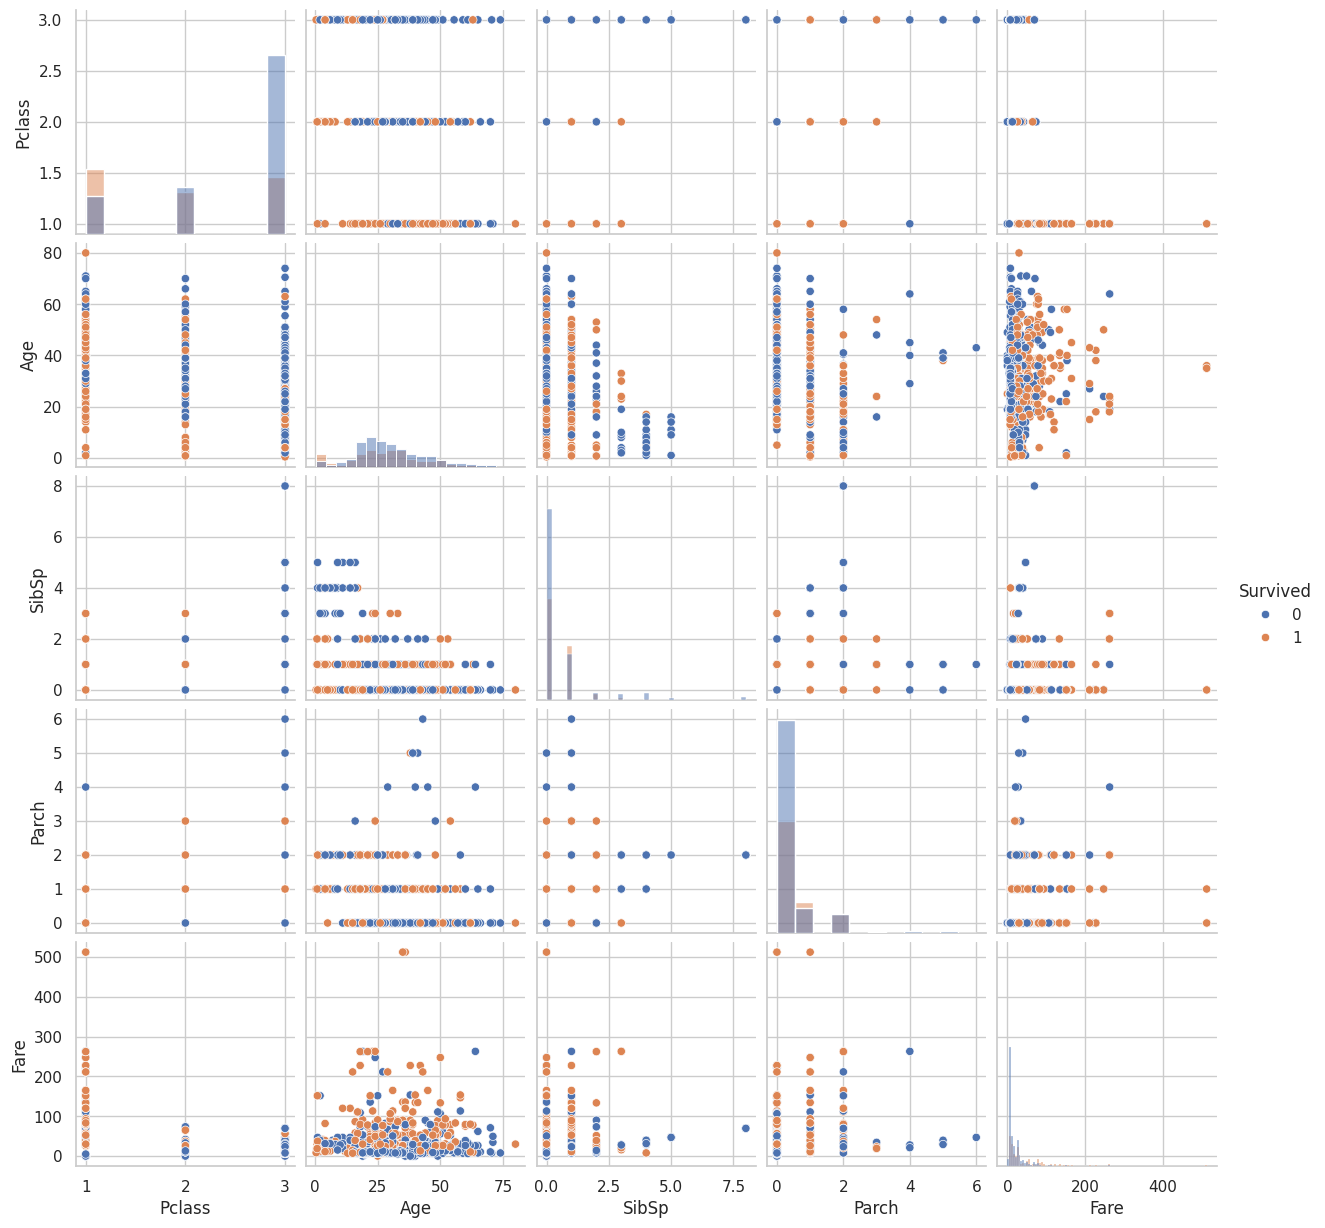

In [5]:
sns.pairplot(df[['Survived','Pclass','Age','SibSp','Parch','Fare']], hue='Survived', diag_kind='hist')
plt.show()

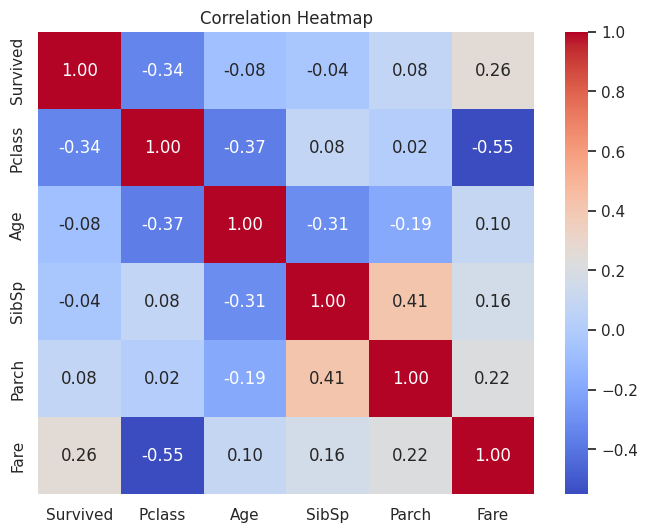

In [6]:
corr = df[['Survived','Pclass','Age','SibSp','Parch','Fare']].corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

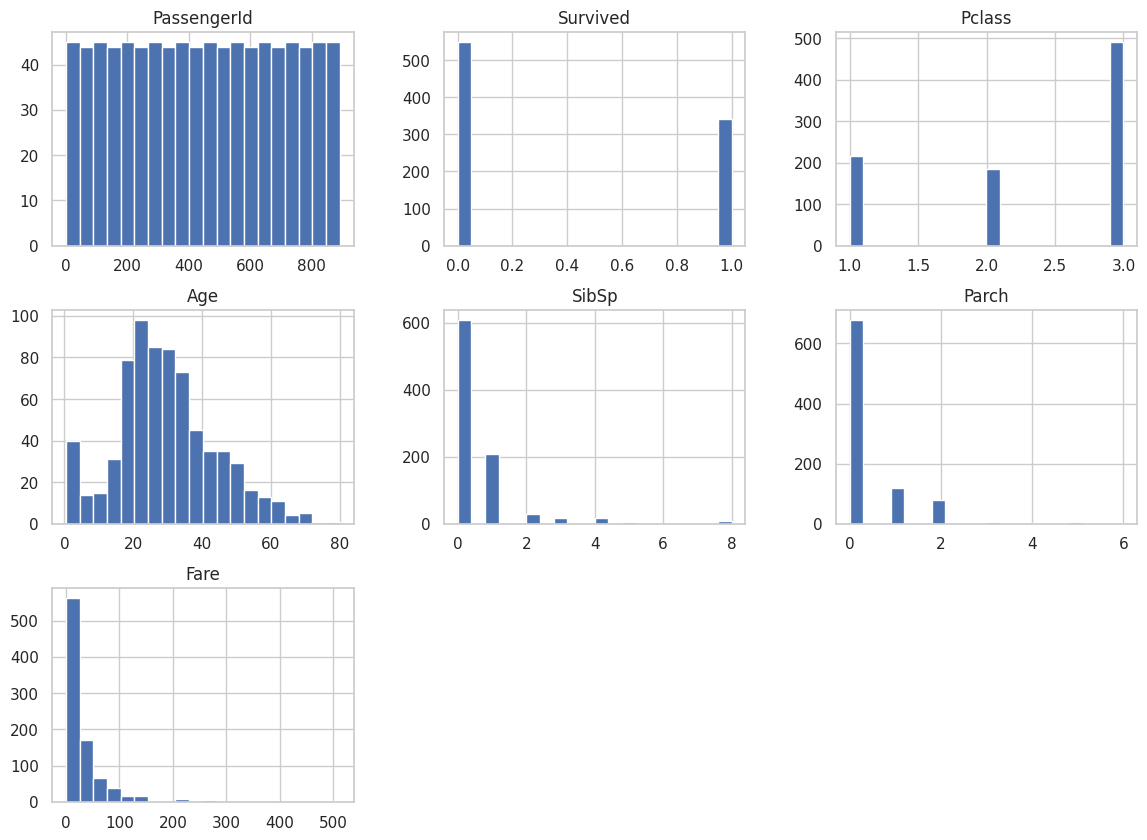

In [7]:
df.hist(bins=20, figsize=(14,10))
plt.show()

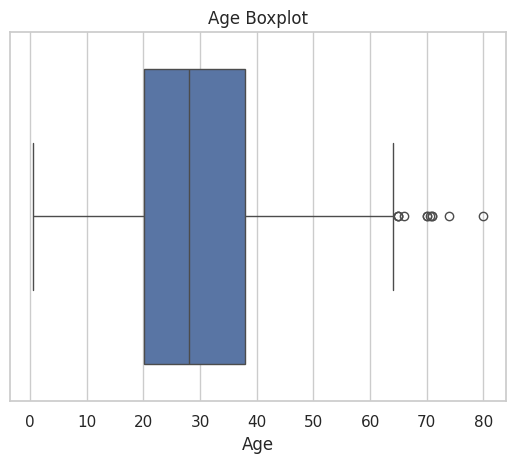

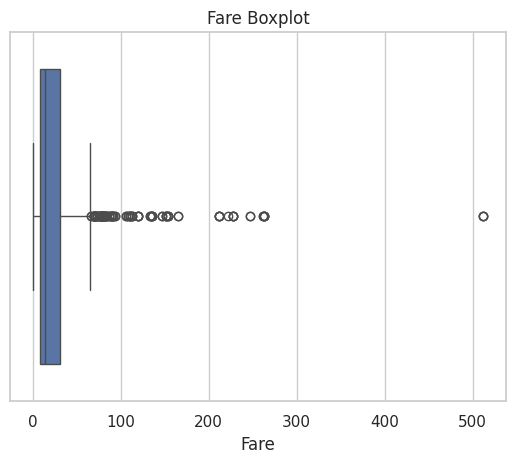

In [8]:
for col in ['Age','Fare']:
    plt.figure()
    sns.boxplot(x=df[col])
    plt.title(f"{col} Boxplot")
    plt.show()

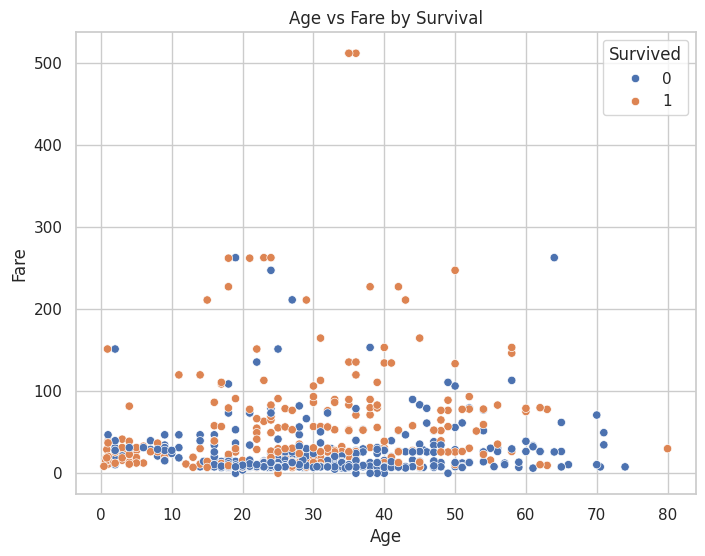

In [9]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='Age', y='Fare', hue='Survived', data=df)
plt.title("Age vs Fare by Survival")
plt.show()

Summary of Findings

# 1. Sex and Pclass are strong predictors of survival.
# 2. Higher Fare correlates with better survival chances.
# 3. Children had higher survival rates.
# 4. Age and Fare have skewness transformation may help modeling.
# 5. Many missing values in Age & Cabin  require handling